<a href="https://colab.research.google.com/github/EndhyP/Tugas_Akhir/blob/main/NASA%20Bearing%20Dataset%20Classification/Nasa_Bearing_dataset_bismillah_berhasil_yaa_Allah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Data yang digunakan pada penelitian ini adalah "Nasa Bearing Dataset"
*   Setiap data mendeskripsikan tentang percobaan uji kegagalan bearing
*   Setiap file terdiri dari 20.480 titik dengan laju pengambilan sampel ditetapkan pada 20 kHz.
*   Dataset dapat diperoleh dari link berikut https://www.kaggle.com/datasets/vinayak123tyagi/bearing-dataset





In [15]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

In [16]:
from google.colab import drive
import os
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Tugas Akhir Endhy Priambodo/Latihan Bearing/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
dataset_path_1st = '/content/drive/MyDrive/Tugas Akhir Endhy Priambodo/Latihan Bearing/1st_test/1st_test'
dataset_path_2nd = '/content/drive/MyDrive/Tugas Akhir Endhy Priambodo/Latihan Bearing/2nd_test/2nd_test'
dataset_path_3rd = '/content/drive/MyDrive/Tugas Akhir Endhy Priambodo/Latihan Bearing/3rd_test/4th_test/txt'

In [55]:
# melakukan test salah satu file yang telah di download
dataset = pd.read_csv('/content/drive/MyDrive/Tugas Akhir Endhy Priambodo/Latihan Bearing/2nd_test/2nd_test/2004.02.12.10.32.39', sep='\t')
filename = '2004.02.12.10.32.39'
dataset

,-0.049,-0.071,-0.132,-0.010
0,-0.042,-0.073,-0.007,-0.105
1,0.015,0.000,0.007,0.000
2,-0.051,0.020,-0.002,0.100
3,-0.107,0.010,0.127,0.054
4,-0.078,-0.212,0.042,-0.044
...,...,...,...,...
20474,0.049,-0.051,-0.039,-0.044
20475,0.037,0.061,0.115,0.007
20476,-0.012,0.007,0.056,-0.007
20477,-0.012,0.093,0.017,-0.044


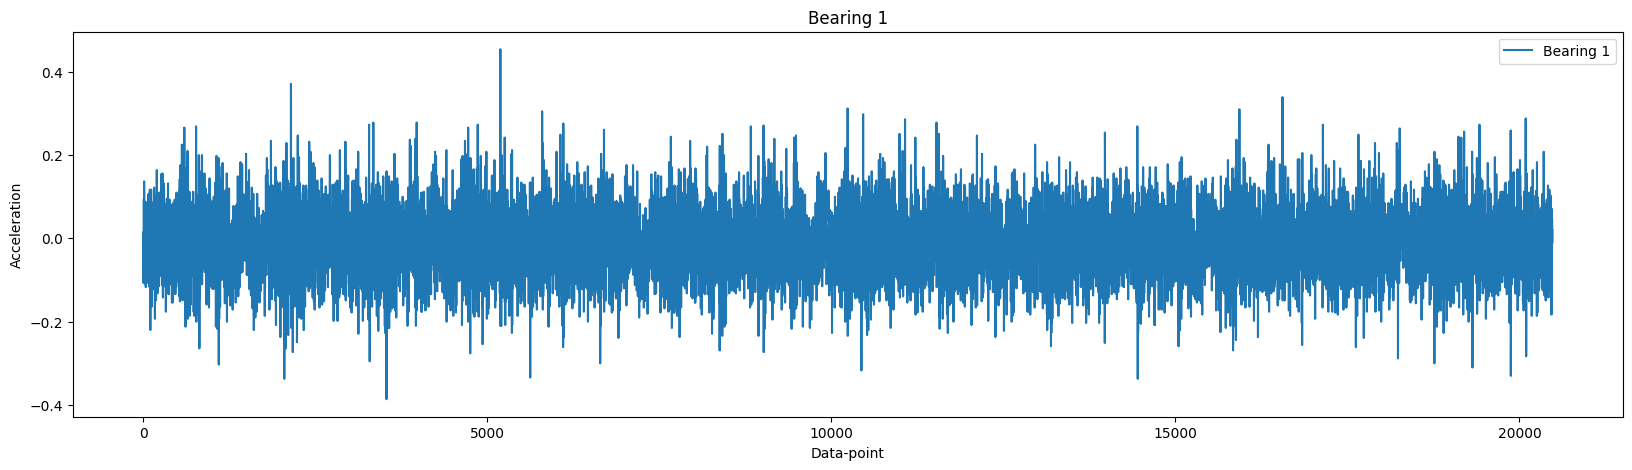

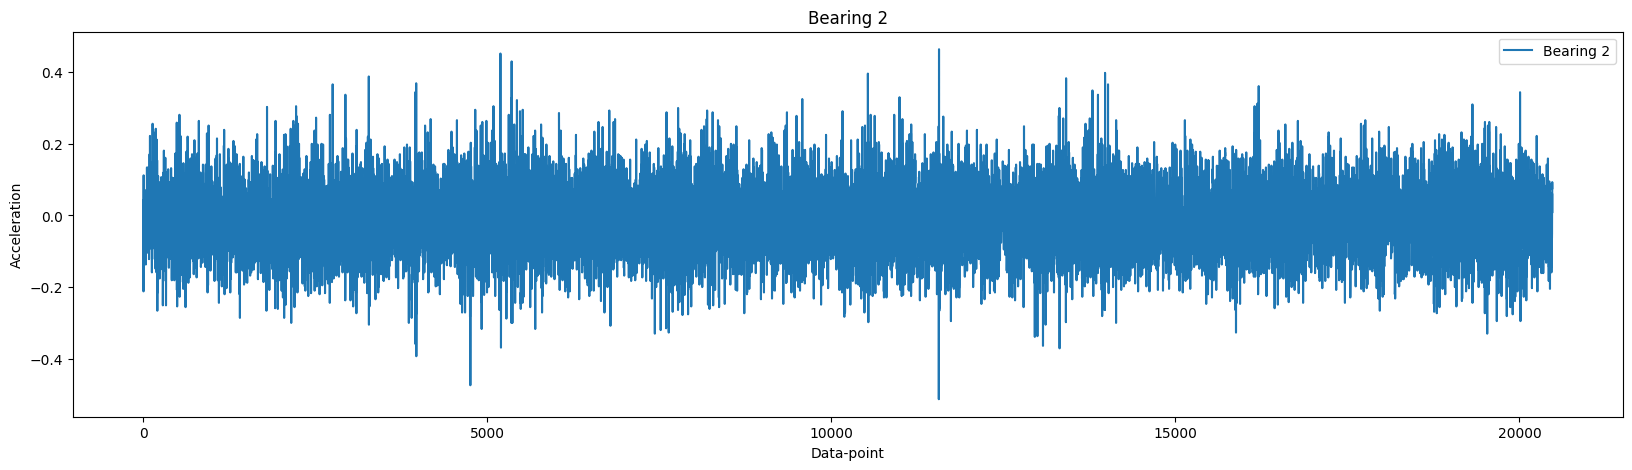

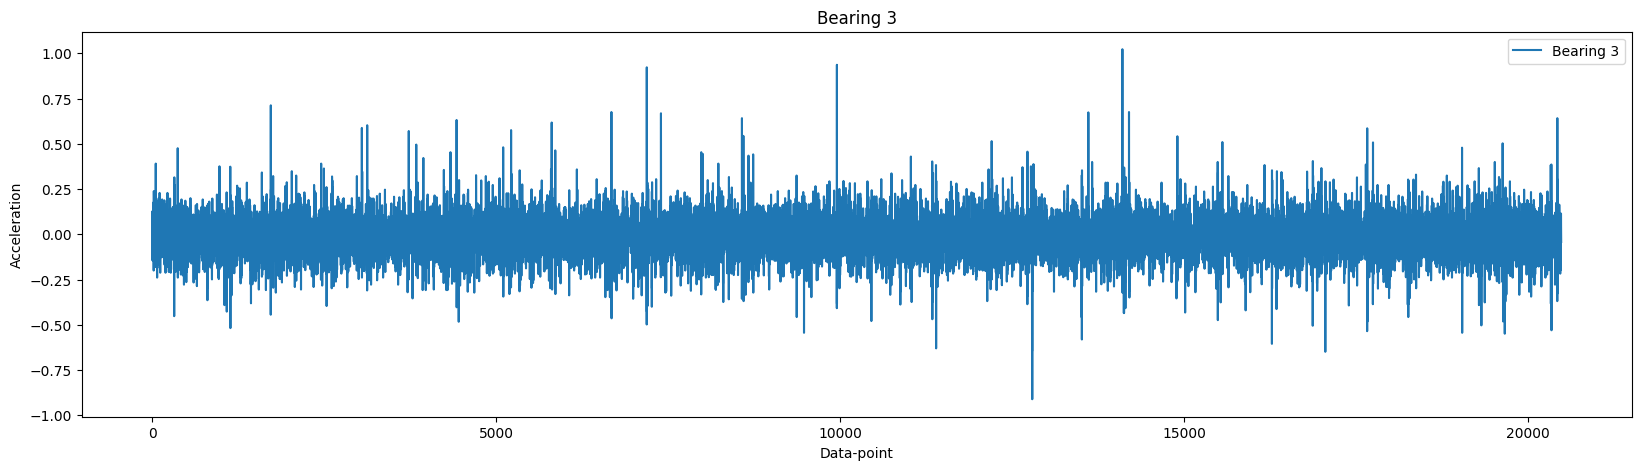

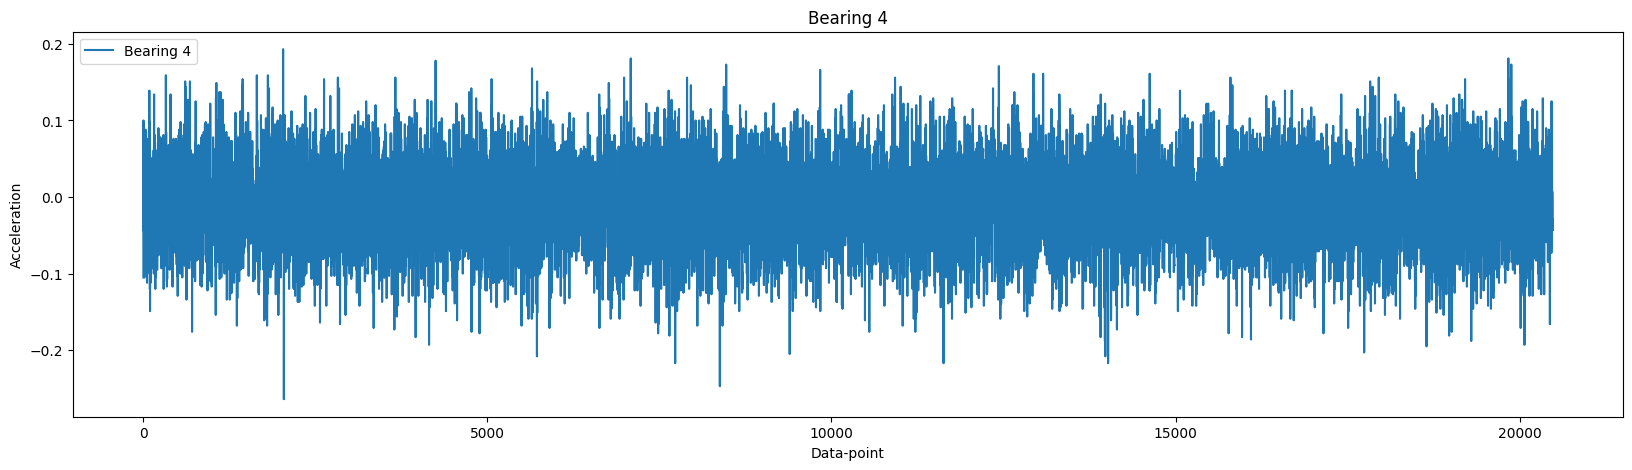

In [19]:
for i in [0,1,2,3]:
    
    df_bearing=np.array(dataset.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)

    plt.legend(['Bearing {}'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {}'.format(i+1))
    plt.show()

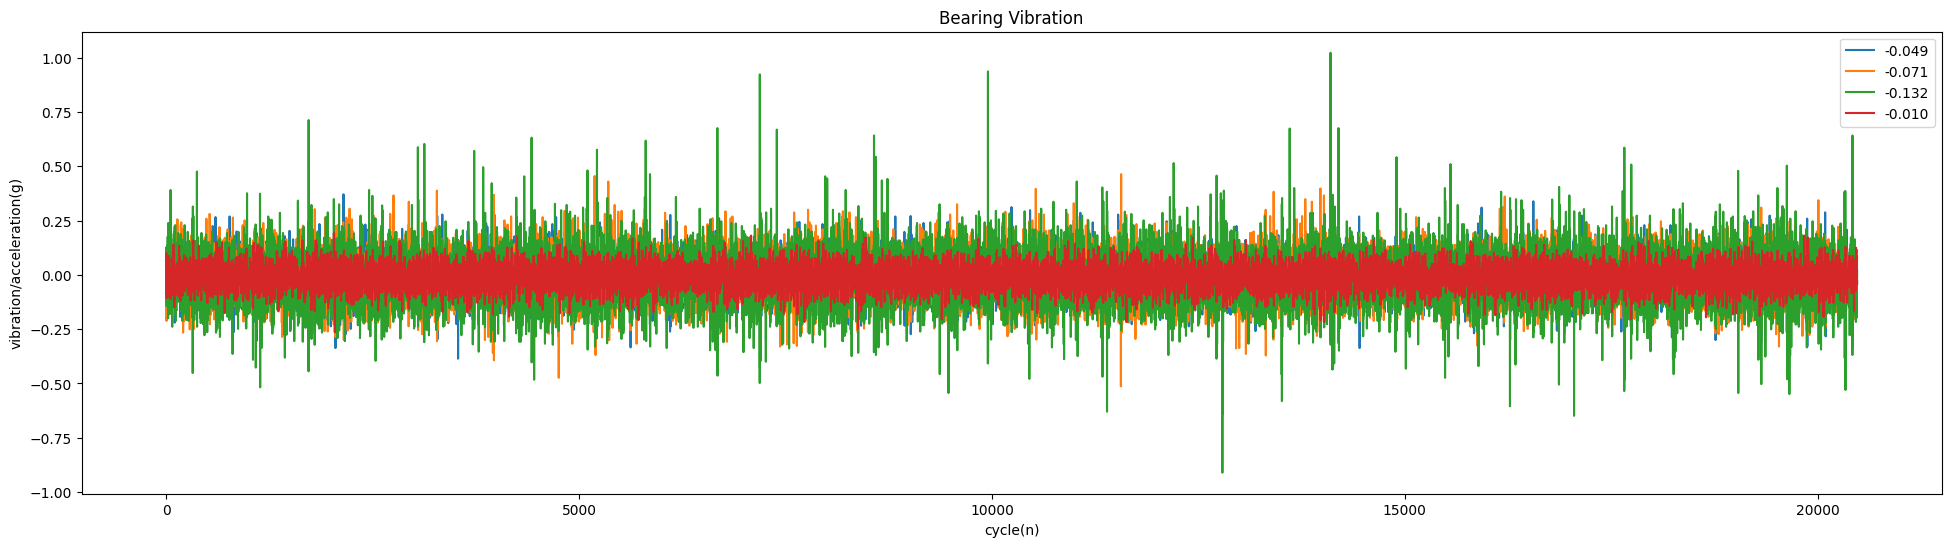

In [20]:
ax = dataset.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

In [21]:
bearing_no=1

bearing_data = np.array(dataset.iloc[:,bearing_no-1])

bearing_data

array([-0.042,  0.015, -0.051, ..., -0.012, -0.012,  0.02 ])

In [22]:
temp = bearing_data
temp

array([-0.042,  0.015, -0.051, ..., -0.012, -0.012,  0.02 ])

In [23]:
feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [25]:
def compute_kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [26]:
feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
feature_matrix

array([[ 0.454     , -0.386     , -0.0101941 ,  0.07347802,  0.07418002,
         0.08391678,  0.62831747,  6.12024645, -7.27675912]])

In [56]:
df = pd.DataFrame(feature_matrix)
df.index=[filename[:-3]]
df

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.454,-0.386,-0.010194,0.073478,0.07418,0.083917,0.628317,6.120246,-7.276759


In [59]:
Time_feature_matrix=pd.DataFrame()

test_set=2

bearing_no=1 # Provide the Bearing number [1,2,3,4] of the Test set

dataset_path_2nd = '/content/drive/MyDrive/Tugas Akhir Endhy Priambodo/Latihan Bearing/2nd_test/2nd_test' 
for filename in os.listdir(dataset_path_2nd):
    
    dataset=pd.read_csv(os.path.join(dataset_path_2nd, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = Time_feature_matrix.append(df)

<ipython-input-59-09b9e3ef0d0c>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
<ipython-input-59-09b9e3ef0d0c>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
<ipython-input-59-09b9e3ef0d0c>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
<ipython-input-59-09b9e3ef0d0c>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
<ipython-input-59-09b9e3ef0d0c>:29: FutureWarning: The frame.append method is deprecated and will be rem

In [60]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

#Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


# Test-2 Bearing Dataset Visualization

In [ ]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv")
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv",index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)
df1